# 데이터 분석 프로젝트(20230611 ~20230616)
    - 데이터 분석 주제 및 목적
        1. 밀양지역에서 경쟁력 있는 가게 업종 분석하기
            1. 경상남도 밀양시에서 주로 영업중인 가게 업종은 무엇인가? - 많이 운영되는 가게업종을 피하기 위함
                1. 밀양 지역별 영업중인 가게 업종 수 분석(막대 그래프, 파이 그래프)            
            2. 음식점은 주로 어디 지역에 분포 되어있는가? - 음식점이 많이 분포되어 있다는 것은 유동인구가 많다는 것을 의미.
                1. 지역별 가게 업종 수 분석(막대 그래프, 파이그래프)
                2. 밀양지역별의 인구수(막대 그래프, 파이그래프)
            3. 위 두가지 분석을 통해 지역별로 업종수를 히트맵으로 분석해 원하는 지역/가게업종 결정하기.
            4. 지역과 가게 업종을 지도상에서 시각적으로 분석하기                
                1. 원하는 지역에서 너무 포화되지 않는 가게업종들의 위치 파악
                2. 사람들이 많이 분포되는 아파트단지 또는 타 업종들이 많이 분포되어 있는 지역선택.
            
    - 사용 데이터 셋 및 확인.
        1. 경상남도 밀양 음식점 데이터 (출처 - 공공데이터포털)
        2. 지도 구현을 위해서 실제 음식점이 존재하지만 위도,경도가 없는 데이터들을 위도,경도 추가.
        
    - 데이터 전처리
        1. 영업중이지않은 음식점은 제외 - (20230611 완료)
        2. 카테고리(가게업종) 컬럼 변환 후 기존 컬럼 인'카테고리'에 재지정. (총 18개) - (20230611 완료)
        3. 소재지전체주소를 기반으로 '동_읍_면' 새로운 컬럼 (총 19개) - (20230611 완료)
        
    - 기능 구현
        - folium 활용한 음식점을 지도에 띄우기
            1. 업종별(카테고리)로 음식점 마커 띄우기 - (20230611 완료)
            2. 읍면동별로 가게수 표시하기 - (20230612 완료)
            3. 읍면동별로 카테고리별로 가게수 표시하기 - (20230612~20230614 완료)
            
        - matplotlib, seaborn을 활용한 데이터 분석하기
            1. 읍면동별로 총 음식점 개수 분석 기능 - (20230611~20230612 완료)
            2. 읍면동별로 특정 카테고리(가게 종류)분석 기능 - (20230612~진행중)
                1. 막대그래프, 파이그래프 (20230614 완료)
            3. 인허가난 날짜 기준 가게 업종 그래프 (20230615 완료)
                1. 10년 단위로 선그래프 (20230615 완료)
     
     - 기능 구현 에로 사항
         1. folium에서 가게업종 출력시 툴팁만 적용되서 스크롤을 하지못함.
         2. 읍면동 및 가게 업종 별로 출력시 하나씩만 됨. 다수개 가능한지 탐색 완료 (20230616진행 예정)
         3. 데이터 분석하기 위한 가정이 더 필요함.
             1. ...
         4. 지역별 인구수 데이터 찾아보기
      

## 1. 모듈 임포트

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
import json
sns.set(font_scale=1.2) # 폰트 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 깨짐 방지

## 2. 파일 불러오기

In [154]:
data = pd.read_csv('C:\\Users\\KDJ\\Downloads\\경상남도 밀양시_음식점_20221024.csv', encoding='cp949',parse_dates=True)
p_data = pd.read_csv('C:\\Users\\KDJ\\Downloads\\경상남도 밀양시_인구 현황_20230331.csv', encoding='cp949')
p_data=p_data.sort_values('인구수(계)',ascending=False) # 인구수 내림차순 정렬
data.head()

,관광상품번호(NameID),관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,도로명전체주소,소재지전체주소,사업장명,...,데이터갱신구분,데이터갱신일자,업태구분명,주메뉴,좌표정보(위도),좌표정보(경도),위생업태명,다중이용업소여부,음식점 분류,카테고리
0,4000001,5360000-101-2021-00063,2021-05-10,1.0,영업/정상,13.0,영업중,"경상남도 밀양시 상남면 운하길 1, 1층 102호",경상남도 밀양시 상남면 예림리 1138-2,밀양김밥,...,U,2021-10-03,김밥(도시락),김밥+일미김밥+해물우동+해물라면,35.464798,128.757234,김밥(도시락),N,일반음식점,포장(도시락)
1,4000002,5360000-101-2021-00057,2021-04-29,1.0,영업/정상,13.0,영업중,경상남도 밀양시 역앞광장로 14-15 (가곡동),경상남도 밀양시 가곡동 592-5,다담뜰한식뷔페 밀양점,...,U,2021-09-25,한식,한식뷔페,35.472977,128.768128,한식,N,일반음식점,뷔페식
2,4000003,5360000-101-2021-00081,2021-06-16,1.0,영업/정상,13.0,영업중,"경상남도 밀양시 부북면 퇴로로 257, 1,2층",경상남도 밀양시 부북면 퇴로리 356-6,아뜰리에,...,U,2021-09-15,경양식,바닐라라떼+아인슈페너+단짠단짠솔티라떼+퇴로못라떼+패션후르츠에이드,35.549110,128.703147,경양식,Y,일반음식점,카페(디저트)
3,4000004,5360000-101-2021-00062,2021-05-03,1.0,영업/정상,13.0,영업중,"경상남도 밀양시 미리벌중앙로1길 12, 1층 (삼문동)",경상남도 밀양시 삼문동 722-10,고혹,...,I,2021-05-05,한식,명란치즈감자전+우삼겹얼큰전골+스지사태전골+고혹새우,35.481894,128.748921,한식,N,일반음식점,술집
4,4000005,5360000-101-2018-00127,2018-02-05,1.0,영업/정상,13.0,영업중,"경상남도 밀양시 중앙로 139, 1층 (가곡동)",경상남도 밀양시 가곡동 640-1,스즈란,...,I,2021-05-05,일식,라멘+새우완탕명+사천식새우완탕,35.477878,128.764059,일식,N,일반음식점,일식


In [155]:
p_data.head()

,읍면동,인구수(계),인구수(남),인구수(여),구성비(계),구성비(남),구성비(여),성비,세대수,세대당인구,관리기관명,관리부서명,부서전화번호,데이터기준일자
14,삼문동,19678,9413,10265,19.16,9.16,9.99,91.70,8329,2.36,경상남도 밀양시청,기획감사담당관,055-359-5821,2023-03-31
12,내이동,17395,8639,8756,16.94,8.41,8.53,98.66,8600,2.02,경상남도 밀양시청,기획감사담당관,055-359-5821,2023-03-31
7,상남면,7980,4001,3979,7.77,3.90,3.87,100.55,4131,1.93,경상남도 밀양시청,기획감사담당관,055-359-5821,2023-03-31
15,가곡동,7609,3583,4026,7.41,3.49,3.92,89.00,4128,1.84,경상남도 밀양시청,기획감사담당관,055-359-5821,2023-03-31
1,하남읍,6849,3422,3427,6.67,3.33,3.34,99.85,3786,1.81,경상남도 밀양시청,기획감사담당관,055-359-5821,2023-03-31


### 2-1. 데이터 컬럼

In [156]:
data.columns

Index(['관광상품번호(NameID)', '관리번호', '인허가일자', '영업상태구분코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '도로명전체주소', '소재지전체주소', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자',
       '업태구분명', '주메뉴', '좌표정보(위도)', '좌표정보(경도)', '위생업태명', '다중이용업소여부', '음식점 분류',
       '카테고리'],
      dtype='object')

### 2-2. 총 데이터 수

In [157]:
data.shape

(1470, 21)

## 3. 데이터 전처리
    - 데이터 분석을 하지못하는 불필요한 데이터(nan값, 이상치 등) 삭제
    - 불러온 로우데이터를 데이터 분석하기 위한 데이터로 변환
    - 엑셀 확인 후 위도 경도가 기입되지 않은 가게들은 http://map.esran.com/ (위도경도찾기)사이트에서 직접찾아서 입력 

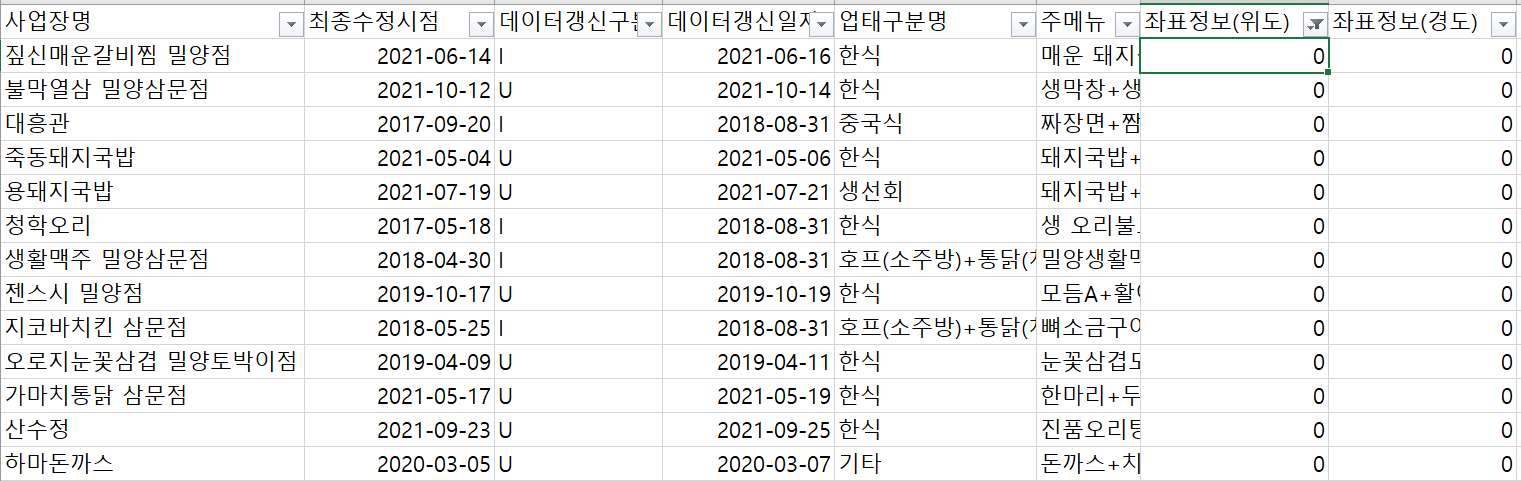

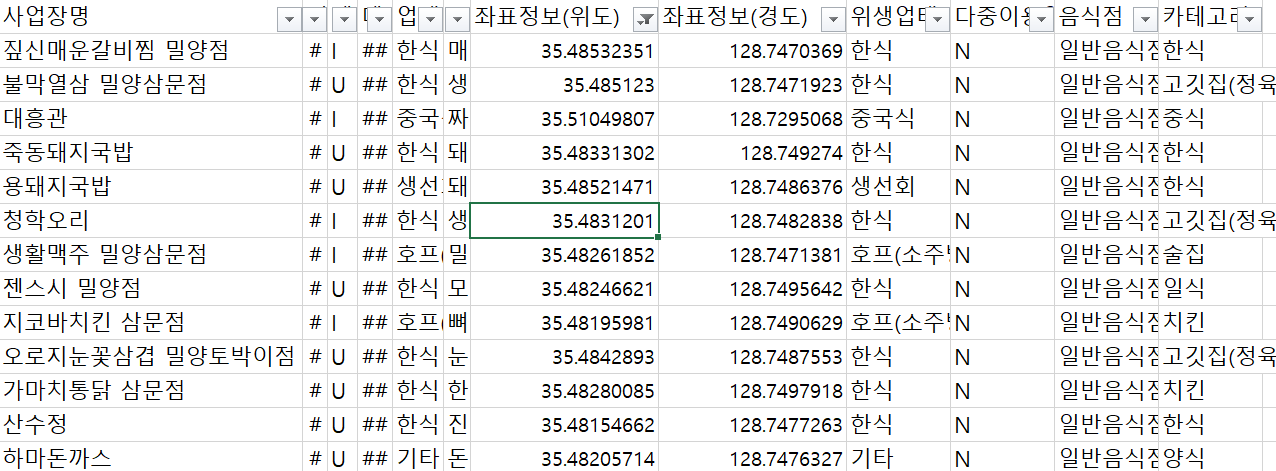

### 3-1. 데이터 영업중이지 않은 데이터 삭제 
    - 기존 1.0과 NaN으로 구성되어있었습니다. 그래서 영업중이란 의미를 가진 '1.0'만을 가진 데이터만 가지고 분석을 진행합니다

In [158]:
data_1 = data[data['영업상태구분코드']==1.0].copy()
data_1.shape

(1460, 21)

### 3-2. 카테고리 컬럼 단순화
    - 기존 카테고리를 기반으로 가게업종이 총 18개인 데이터로 수정 작업을 진행할 예정입니다.
    - 한식, 중식, 일식, 양식, 분식, 카페(디저트), 술집, 고깃집(정육점), 패스트푸드, 베이커리, 치킨 ,생선회, 토스트, 게/대게, 건어물, 샐러드, 베트남 음식,기타 총 18개의 카테고리를 사용.

In [159]:
print('기존 카테고리 컬럼 값')
print(data_1['카테고리'].unique())
print('기존 카테고리 총개수: ',len(data_1['카테고리'].unique()))

기존 카테고리 컬럼 값
['포장(도시락)' '뷔페식' '카페(디저트)' '술집' '일식' '한식' '고깃집(정육점)' '생선회' '양식' '치킨' '기타'
 '패스트푸드' '중식' '분식' '베이커리' '한식+양식+일식']
기존 카테고리 총개수:  16


#### 3-2-1. 기존 카테고리가 '포장(도시락)'인 데이터를 위에 정의한 카테고리로 변환.
    - 김밥류는 분식으로, 도시락류는 한식으로, 치킨은 치킨으로, 핫도그 및 타코야끼는 패스트푸드로, 토스트는 토스트로 카테고리 컬럼 변환.

In [160]:
dic_data1={0 : '분식', 17:'한식', 80:'치킨', 181: '한식', 278:'한식', 297:'한식', 347:'치킨', 693:'한식', 737:'패스트푸드',
           787:'패스트푸드', 1256:'분식', 1325:'한식', 1334:'토스트', 1354:'분식', 1443:'한식', 1453:'한식'}
for i in dic_data1:
    data_1.loc[i,'카테고리']=dic_data1[i]

#### 3-2-2. 기존 카테고리가 '기타'인 데이터를 위에 정의한 카테고리로 변환.

In [161]:
dic_data2={38:'카페(디저트)',58:'한식',91:'게/대게',220:'건어물',457:'한식',984:'샐러드',1173:'베트남 음식',
           1210:'패스트푸드',1409:'베트남 음식'}
for i in dic_data2:
    data_1.loc[i,'카테고리']=dic_data2[i]

#### 3-2-3. 기존 카테고리가 '뷔페식'인 데이터를 위에 정의한 카테고리로 변환.

In [162]:
dic_data3={1:'한식',854:'한식',1261:'한식',1272:'한식'}
for i in dic_data3:
    data_1.loc[i,'카테고리']=dic_data3[i]

#### 3-2-4. 기존 카테고리가 '한식+일식+중식'인 데이터를 위에 정의한 카테고리로 변환.
    - 데이터가 1개뿐이라 바로 삽입으로 변환

In [163]:
data_1[data_1['카테고리']=='한식+양식+일식']
data_1.loc[1432,'카테고리']='한식'

#### 3-2-5. 기존 카테고리에서 설정한 카테고리로 데이터 전처리 결과

In [164]:
print('새로 수정한 가게 업종 리스트\n',data_1['카테고리'].unique())
print('새로 설정한 가게 업종 수 :',len(data_1['카테고리'].unique()))


새로 수정한 가게 업종 리스트
 ['분식' '한식' '카페(디저트)' '술집' '일식' '고깃집(정육점)' '생선회' '양식' '치킨' '패스트푸드' '중식'
 '게/대게' '베이커리' '건어물' '샐러드' '베트남 음식' '토스트' '기타']
새로 설정한 가게 업종 수 : 18


### 3-3 읍면동 컬럼 추가
    - xx동, xx면, xx동 데이터형태로 만들어서 읍면동 별로 데이터분석을 진행할 예정입니다.
    - 기존컬럼인 '소재지전체주소'의 데이터를 뽑아와서 새로운 '읍_면_동' 컬럼을 생성합니다.
    - 소재지전체주소 데이터 형태는 '경상남도 xx시 xx동 세부주소'입니다.
    - 그래서 공백으로 스플릿하여 3번째 있는 데이터가 읍면동이므로 사용하도록 합니다.

In [165]:
# 소재지전체주소의 데이터 형태
data_1.loc[200]['소재지전체주소']

'경상남도 밀양시 무안면 무안리 812-4 무안면복지센터'

In [166]:
# 읍_면_동 새로운 컬럼 생성
data_1['읍_면_동']=np.nan

# ' '기준 스플릿할때 소재지전체주소 앞쪽 공백이있는 경우가 있어서 lstrip으로 공백 없앰.
for i in data_1.index:
    data_1.loc[i,'읍_면_동'] = data_1.loc[i]['소재지전체주소'].lstrip().split(' ')[2]
    if(data_1.loc[i]['소재지전체주소'].lstrip().split(' ')[2]=='봉의리'):
        data_1.loc[i,'읍_면_동'] = '산내면'
        
data_1.head()

,관광상품번호(NameID),관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,도로명전체주소,소재지전체주소,사업장명,...,데이터갱신일자,업태구분명,주메뉴,좌표정보(위도),좌표정보(경도),위생업태명,다중이용업소여부,음식점 분류,카테고리,읍_면_동
0,4000001,5360000-101-2021-00063,2021-05-10,1.0,영업/정상,13.0,영업중,"경상남도 밀양시 상남면 운하길 1, 1층 102호",경상남도 밀양시 상남면 예림리 1138-2,밀양김밥,...,2021-10-03,김밥(도시락),김밥+일미김밥+해물우동+해물라면,35.464798,128.757234,김밥(도시락),N,일반음식점,분식,상남면
1,4000002,5360000-101-2021-00057,2021-04-29,1.0,영업/정상,13.0,영업중,경상남도 밀양시 역앞광장로 14-15 (가곡동),경상남도 밀양시 가곡동 592-5,다담뜰한식뷔페 밀양점,...,2021-09-25,한식,한식뷔페,35.472977,128.768128,한식,N,일반음식점,한식,가곡동
2,4000003,5360000-101-2021-00081,2021-06-16,1.0,영업/정상,13.0,영업중,"경상남도 밀양시 부북면 퇴로로 257, 1,2층",경상남도 밀양시 부북면 퇴로리 356-6,아뜰리에,...,2021-09-15,경양식,바닐라라떼+아인슈페너+단짠단짠솔티라떼+퇴로못라떼+패션후르츠에이드,35.549110,128.703147,경양식,Y,일반음식점,카페(디저트),부북면
3,4000004,5360000-101-2021-00062,2021-05-03,1.0,영업/정상,13.0,영업중,"경상남도 밀양시 미리벌중앙로1길 12, 1층 (삼문동)",경상남도 밀양시 삼문동 722-10,고혹,...,2021-05-05,한식,명란치즈감자전+우삼겹얼큰전골+스지사태전골+고혹새우,35.481894,128.748921,한식,N,일반음식점,술집,삼문동
4,4000005,5360000-101-2018-00127,2018-02-05,1.0,영업/정상,13.0,영업중,"경상남도 밀양시 중앙로 139, 1층 (가곡동)",경상남도 밀양시 가곡동 640-1,스즈란,...,2021-05-05,일식,라멘+새우완탕명+사천식새우완탕,35.477878,128.764059,일식,N,일반음식점,일식,가곡동


### 3-4 folium 마커 아이콘 리스트업
    - 가게 업종 별 마커를 찍기 위해 불러올 수 있는 아이콘을 리스트하였습니다.

In [167]:
# 카테고리 별 아이콘 주소 리스트 업
category_Icon={'분식':'egg', 
               '한식':'bowl-food', 
               '카페(디저트)':'mug-saucer',
               '술집':'wine-bottle', 
               '일식':'bowl-rice',
               '고깃집(정육점)':'piggy-bank',
               '생선회':'fish',
               '양식':'utensils',
               '치킨':'drumstick-bite',
               '패스트푸드':'burger',
               '중식':'shrimp',
               '게/대게':'bug',
               '베이커리':'bread-slice',
               '건어물':'fish-fins',
               '샐러드':'wheat-awn',
               '베트남 음식':'plate-wheat',
               '토스트':'hotdog',
               '기타':'stroopwafel'
              }

### 3-5 읍면동 별 가게업종수에 대한 데이터 프레임 만들기

In [168]:
# 읍면동 별로 카테고리별로 가게수 출력하기
# 1. 기존 데이터베이스에서 읍면동별로 가게수 출력하기 위한 데이터 프레임 data_2선언 
data_2 = data_1[['읍_면_동', '카테고리']].copy()

# 2. 가게수 새로운 컬럼 생성 및 0으로 초기화
data_2['가게수']=0

data_2.head()

,읍_면_동,카테고리,가게수
0,상남면,분식,0
1,가곡동,한식,0
2,부북면,카페(디저트),0
3,삼문동,술집,0
4,가곡동,일식,0


In [169]:
# 3. 읍면동 별로 가게수 카운팅합니다.
# 생성된 data_3데이터프레임은 가게수만 접근 가능하고, 읍_면_동, 카테고리별 접급이 불가능해집니다.

data_3= data_2.groupby(['읍_면_동', '카테고리']).count()
data_3.head(15)

가게수
읍_면_동 카테고리         
가곡동   고깃집(정육점)    5
      분식          3
      생선회         4
      술집          3
      일식          1
      중식          5
      치킨          1
      카페(디저트)    14
      한식         27
교동    고깃집(정육점)    2
      분식          3
      생선회         2
      중식          1
      치킨          1
      카페(디저트)     5

In [170]:
data_3.iloc[0]

가게수    5
Name: (가곡동, 고깃집(정육점)), dtype: int64

In [171]:
# 4. 데이터 분석을 위해 읍_면_동, 카테고리 별로 접근가능 하도록 리셋 인덱싱을 진행합니다. 
# 리셋 인덱싱 후 읍_면_동, 카테고리별로 접근이 가능해 집니다.
m_data = data_3.reset_index()
m_data.head(15)


,읍_면_동,카테고리,가게수
0,가곡동,고깃집(정육점),5
1,가곡동,분식,3
2,가곡동,생선회,4
3,가곡동,술집,3
4,가곡동,일식,1
5,가곡동,중식,5
6,가곡동,치킨,1
7,가곡동,카페(디저트),14
8,가곡동,한식,27
9,교동,고깃집(정육점),2


## 4. 데이터 분석

### 4-1. 음식점은 주로 어디 지역에 분포 되어있는가?
    - 지역별 가게 업종 수 분석 (막대 그래프, 파이그래프)
	- 밀양지역별의 인구수 분석 (막대 그래프, 파이그래프)


In [172]:
# 지역별 총 가게수
data_1['읍_면_동'].value_counts()

삼문동     336
내이동     323
하남읍     115
삼랑진읍    115
단장면     102
내일동      65
가곡동      63
상남면      58
부북면      53
무안면      45
산내면      45
산외면      42
교동       26
상동면      25
초동면      19
용평동       9
청도면       8
활성동       7
남포동       4
Name: 읍_면_동, dtype: int64

In [173]:
# 지역별 인구수
p_data[['읍면동','인구수(계)']]

,읍면동,인구수(계)
14,삼문동,19678
12,내이동,17395
7,상남면,7980
15,가곡동,7609
1,하남읍,6849
0,삼랑진읍,6345
13,교동,5413
2,부북면,5017
9,무안면,4853
6,단장면,4254


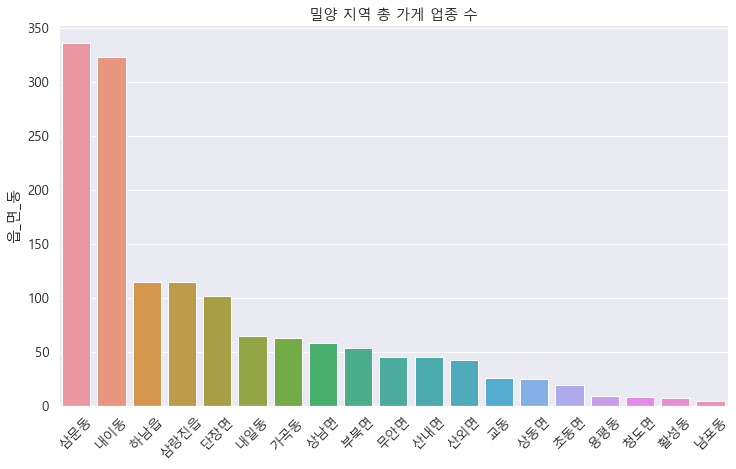

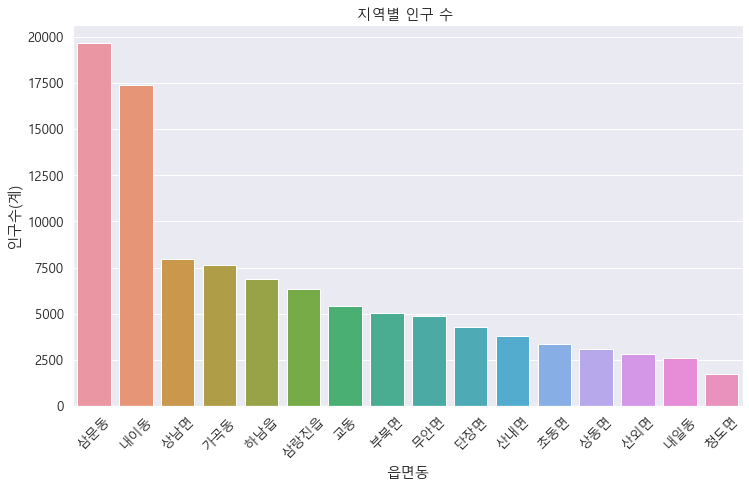

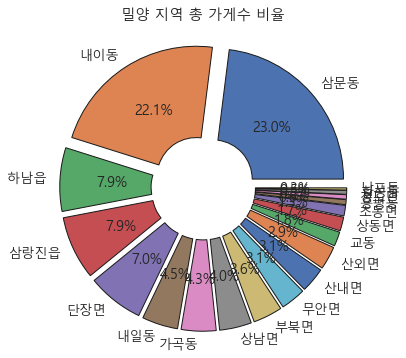

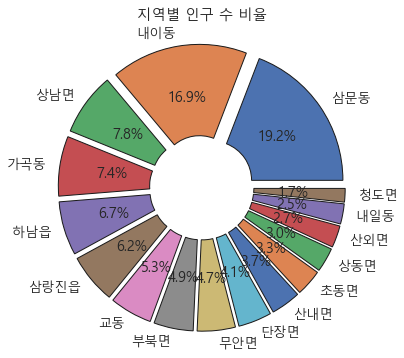

In [174]:
# 밀영 지역별 가게 수 분석하기 - 막대그래프
plt.figure(1,[12,7])
x = data_1['읍_면_동'].value_counts().index
y = data_1['읍_면_동'].value_counts()
sns.barplot(x=x,y=y)
plt.xticks(rotation=45)
plt.title(f'밀양 지역 총 가게 업종 수')

# 밀양 지역별 인구 수 - 막대 그래프
plt.figure(2,[12,7])
x = p_data['읍면동']
y = p_data['인구수(계)']

sns.barplot(x=x,y=y)
plt.xticks(rotation=45)
plt.title(f'지역별 인구 수 ')

# 밀양 지역별로 가게 수 분석하기 - 파이그래프
plt.figure(3,[8,6])
wedgeprops = {'width':0.7,'edgecolor':'k','linewidth':1 }
x =list(data_1['읍_면_동'].value_counts())
labels = data_1['읍_면_동'].value_counts().index
explode = []
for i in range(len(x)):
    explode.append(0.1)
    
plt.pie(x, labels=labels, autopct='%.1f%%',explode=explode,wedgeprops=wedgeprops)
plt.title(f'밀양 지역 총 가게수 비율')

# 밀양 지역별 인구 비율 - 파이그래프
plt.figure(4,[8,6])
wedgeprops = {'width':0.7,'edgecolor':'k','linewidth':1 }
x =p_data['인구수(계)']
labels = p_data['읍면동']
explode = []
for i in range(len(x)):
    explode.append(0.1)
    
plt.pie(x, labels=labels, autopct='%.1f%%',explode=explode,wedgeprops=wedgeprops)
plt.title(f'지역별 인구 수 비율')

plt.show()

### 4-2. 경상남도 밀양시에서 주로 영업중인 가게 업종은 무엇인가? 
	- 밀양 지역별 영업중인 가게 업종 수 분석 (막대 그래프, 파이 그래프)            


In [175]:
# 지역별 가게 업종 수 데이터프레임
m_data

,읍_면_동,카테고리,가게수
0,가곡동,고깃집(정육점),5
1,가곡동,분식,3
2,가곡동,생선회,4
3,가곡동,술집,3
4,가곡동,일식,1
...,...,...,...
137,하남읍,패스트푸드,4
138,하남읍,한식,54
139,활성동,고깃집(정육점),1
140,활성동,카페(디저트),2


읍면동 지역 리스트
 ['가곡동' '교동' '남포동' '내이동' '내일동' '단장면' '무안면' '부북면' '산내면' '산외면' '삼랑진읍' '삼문동'
 '상남면' '상동면' '용평동' '청도면' '초동면' '하남읍' '활성동']
지역을 입력해주세요 : 삼문동


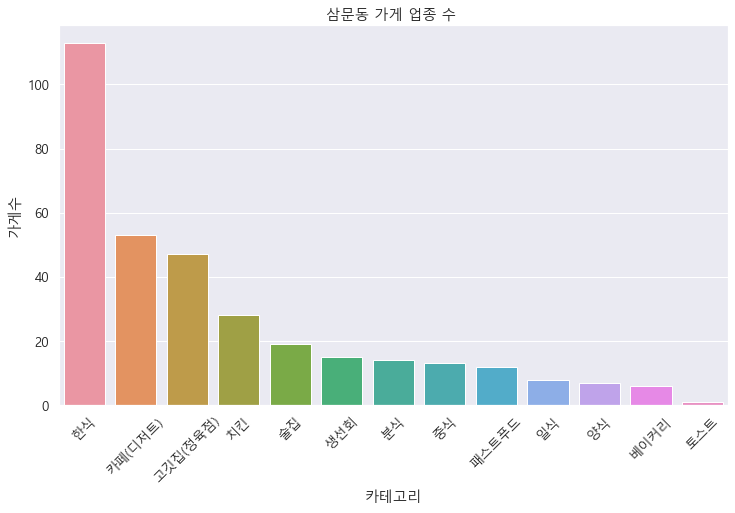

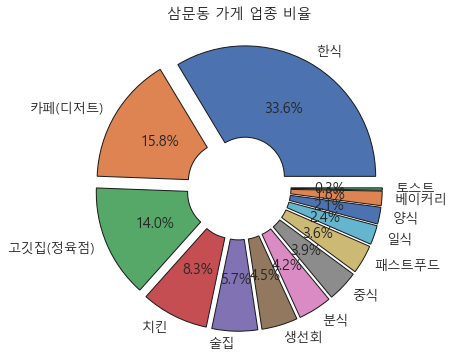

In [177]:
# 지역 내 가게 업종 수 분석하기 - 막대그래프
print("읍면동 지역 리스트\n",m_data['읍_면_동'].unique())
region = input('지역을 입력해주세요 : ')

plt.figure(1,[12,7])
x = m_data[m_data['읍_면_동']==region].sort_values('가게수',ascending=False)['카테고리']
y = m_data[m_data['읍_면_동']==region].sort_values('가게수',ascending=False)['가게수']

sns.barplot(x=x,y=y)
plt.xticks(rotation=45)
plt.title(f'{region} 가게 업종 수 ')

# 지역 내 가게 업종 수 분석하기 - 파이그래프
plt.figure(2,[8,6])
wedgeprops = {'width':0.7,'edgecolor':'k','linewidth':1 }
x =list(m_data[m_data['읍_면_동']==region].sort_values('가게수',ascending=False)['가게수'])
labels = list(m_data[m_data['읍_면_동']==region].sort_values('가게수',ascending=False)['카테고리'])
explode = []
for i in range(len(x)):
    explode.append(0.1)
    
plt.pie(x, labels=labels, autopct='%.1f%%',explode=explode,wedgeprops=wedgeprops)
plt.title(f'{region} 가게 업종 비율')

plt.show()

### 4-3. 원하는 지역/가게업종 결정하기.
	- 위의 분석을 통해 지역별로 업종수를 히트맵으로 표현하여 결정


In [178]:
# 지역별 가게 업종 수 분석 히트맵 분석

# 인덱스는 지역, 컬럼은 가게업종으로 하는 데이터 프레임 선언 및 모든 값 0으로 초기화
rsc_df = pd.DataFrame(0,index=m_data['읍_면_동'].unique(),columns=m_data['카테고리'].unique())
rsc_df

,고깃집(정육점),분식,생선회,술집,일식,중식,치킨,카페(디저트),한식,패스트푸드,건어물,게/대게,베트남 음식,샐러드,양식,베이커리,토스트,기타
가곡동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
교동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
남포동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
내이동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
내일동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
단장면,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
무안면,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
부북면,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
산내면,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
산외면,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [179]:
# 지역별 가게업종 수 데이터 프레임.
m_data

,읍_면_동,카테고리,가게수
0,가곡동,고깃집(정육점),5
1,가곡동,분식,3
2,가곡동,생선회,4
3,가곡동,술집,3
4,가곡동,일식,1
...,...,...,...
137,하남읍,패스트푸드,4
138,하남읍,한식,54
139,활성동,고깃집(정육점),1
140,활성동,카페(디저트),2


In [180]:
# 지역별 가게업종 수 rsc_df에 넣기
for i in m_data.index:
    rsc_df.loc[m_data.loc[i,'읍_면_동'],m_data.loc[i,'카테고리']] = m_data.loc[i,'가게수']

rsc_df

,고깃집(정육점),분식,생선회,술집,일식,중식,치킨,카페(디저트),한식,패스트푸드,건어물,게/대게,베트남 음식,샐러드,양식,베이커리,토스트,기타
가곡동,5,3,4,3,1,5,1,14,27,0,0,0,0,0,0,0,0,0
교동,2,3,2,0,0,1,1,5,11,1,0,0,0,0,0,0,0,0
남포동,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0
내이동,50,17,9,11,5,11,21,31,150,7,1,1,2,1,6,0,0,0
내일동,2,6,1,1,2,0,5,14,33,0,0,0,0,0,0,1,0,0
단장면,5,0,3,0,0,4,3,25,59,0,0,0,0,0,2,1,0,0
무안면,4,3,2,0,0,4,2,3,27,0,0,0,0,0,0,0,0,0
부북면,3,1,0,1,0,4,1,12,30,0,0,0,0,0,1,0,0,0
산내면,5,0,0,0,0,2,3,7,28,0,0,0,0,0,0,0,0,0
산외면,1,0,3,0,0,2,1,8,27,0,0,0,0,0,0,0,0,0


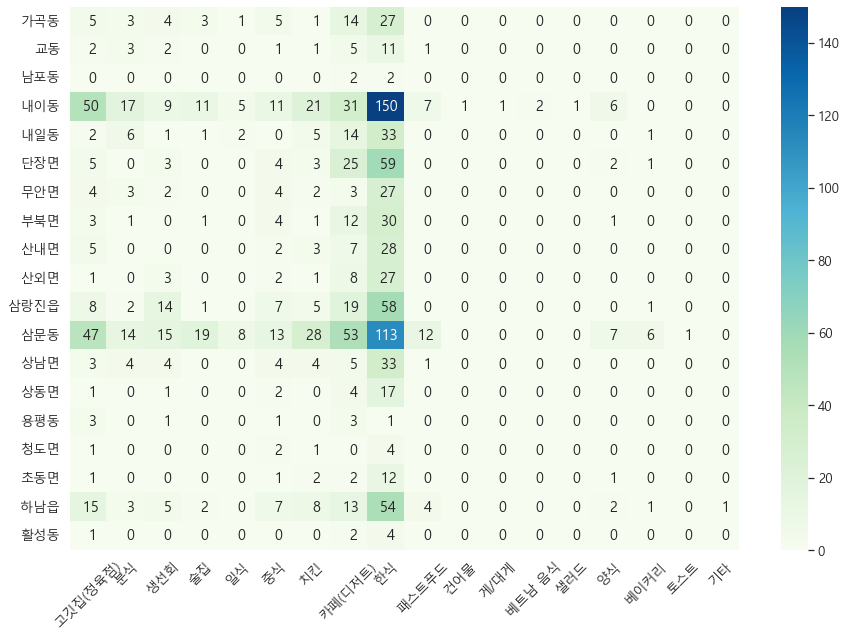

In [181]:
# rsc_df으로 히트맵 분석
plt.figure(1,[15,10])
sns.heatmap(data=rsc_df,annot=True,cmap='GnBu',fmt="3")
plt.xticks(rotation=45)
plt.show()

## 5. 데이터 맵핑

### 5-1 데이터 선언 및 입력
    - 전처리한 데이터프레임(data_1)을 final_df로 선언합니다
    - 읍면동별로 가게업종수를 저장하는 데이터프레임(m_data)를 m_df로 선언합니다.
    - 밀양의 지역별, 가게업종별로 볼 수 있도록 입력받습니다.

In [186]:
final_df = data_1
m_df = m_data

print('밀양 읍면동\n',final_df['읍_면_동'].unique())
option1 = input("원하는 읍면동을 입력해주세요 (모든 읍면동 : '전체' 입력): ")
print('밀양 가게업종\n',final_df['카테고리'].unique())
option2 = input("검색하고 싶은 가게 업종을 입력해주세요 (모든 가게업종 : '전체' 입력): ")

if(len(option1.split(' '))!=1):
    final_df = final_df.loc[final_df.읍_면_동.isin(option1.split(' '))]
#     m_df = m_df.loc[m_df.읍_면_동.isin(option1.split(' '))]
elif(option1 == '전체'):
    pass
else:
    final_df = final_df[final_df['읍_면_동']==option1]
#     m_df = m_df[m_df['읍_면_동']==option1]
        
if(len(option2.split(' '))!=1):
    final_df = final_df.loc[final_df.카테고리.isin(option2.split(' '))]   
#     m_df = m_df.loc[m_df.카테고리.isin(option2.split(' '))]   
elif(option2 == '전체'):
    pass
else:
    final_df = final_df[final_df['카테고리']==option2]
#     m_df = m_df[m_df['카테고리']==option2]
    

# 필요한 컬럼만 출력
final_df = final_df[['사업장명','주메뉴','카테고리','좌표정보(위도)','좌표정보(경도)']]


Map_Miryang = folium.Map(location =[35.50381738244589,128.74659983620973 ], zoom_start=10)

for i in final_df.index:
    icon_name = category_Icon[final_df.loc[i]['카테고리']]
    tooltip_msg = f"({final_df.loc[i]['카테고리']}) {final_df.loc[i]['사업장명']}" 
    folium.Marker([ final_df.loc[i]['좌표정보(위도)'],final_df.loc[i]['좌표정보(경도)']], popup='<div style="display:inline-block;">'+final_df.loc[i]['주메뉴']+'</div>', tooltip=tooltip_msg,icon = folium.Icon(color='black',  icon='fa-solid fa-'+icon_name, prefix='fa')).add_to(Map_Miryang)

# 밀양 지역 geojson파일 경로지정.
geojson_path = './milyang.geojson'    

# 한글이 깨져서 utf-8로 인코딩하여 불러오기
with open(geojson_path, 'r', encoding='utf-8') as f:
    txt = f.read()

# 분석한 데이터를 넣기위한 문자열 딕셔너리 화 
m_geodata = json.loads(txt)



# 밀양 지역 데이터에 읍면동 별 총 가게수 삽입
for i in range(len(m_df)):
    for j in range(len(m_geodata['features'])):
        if(m_geodata['features'][j]['properties']['읍면동']==m_df.loc[i]['읍_면_동']):
            m_geodata['features'][j]['properties']['총가게수']=str(m_df.loc[i]['가게수']) +'개' # 읍면동별 총가게수 카운팅
            continue

# 카테고리, 가게 업종별 리스트업
store_name_list=list(final_df['카테고리'].unique())
store_name_list_aliases=[]
for i in range(len(store_name_list)):
    store_name_list_aliases.append(store_name_list[i]+' :')
            
            
# 밀양 지역 지역별 가게 수 삽입.
for i in range(len(m_geodata['features'])):# 첫번째 for문을 활용해서 geodata속성을 하나씩 읽기. 즉, 읍면동 별로 읽음(19번)
    # 2중 첫번째 for문으로로 geodata에 모든가게들의 업종을 초기값0으로 삽입
    for name in store_name_list:
        m_geodata['features'][i]['properties'][name]='0'
        
    # 2중 두번째 for문으로 실제 지역별 가게수 삽입하기
    # 지역별 가게수가 담긴 데이터 프레임을 temp_data에 선언 
    temp_data=m_df[m_df['읍_면_동']==m_geodata['features'][i]['properties']['읍면동']]
    # 2중 두번째 for문
    for count in range(len(temp_data)):
        m_geodata['features'][i]['properties'][temp_data['카테고리'].iloc[count]]=str(temp_data['가게수'].iloc[count])


        
            
folium.Choropleth(
    geo_data=m_geodata, # json형태로 들어가면됨, str형, dict형 다 가능합니다.
    data=m_df,
    columns=('읍_면_동', '가게수'),  # 데이터프레임에서 사용할 열을 선택합니다.
    key_on='feature.properties.읍면동',  # GeoJSON 파일의 지역명에 해당하는 키를 지정합니다.
    fill_color='BuPu',  # 색상 맵을 지정합니다.
    fill_opacity=0.7,  # 채우기의 투명도를 조절합니다.
    line_opacity=0.2,  # 경계선의 투명도를 조절합니다.
    legend_name='milyang_data',  # 범례 이름을 지정합니다.
).add_to(Map_Miryang)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

NIL=folium.features.GeoJson(
        m_geodata,
        style_function=style_function, 
        control=False,
        highlight_function=highlight_function, 
        tooltip=folium.features.GeoJsonTooltip(fields=['읍면동','총가게수']+store_name_list,
            aliases=['읍면동 :','총가게 수:']+store_name_list_aliases,
            style=("background-color: white; color: #333333; font-family: arial; font-size: 10px; padding: 5px; height:200px;overflow-y:scroll"),                               
            sticky=True
            )
        
    )
Map_Miryang.add_child(NIL)
Map_Miryang.keep_in_front(NIL)

Map_Miryang.save('miryang_map.html')
Map_Miryang

밀양 읍면동
 ['상남면' '가곡동' '부북면' '삼문동' '삼랑진읍' '내이동' '초동면' '하남읍' '활성동' '단장면' '산내면' '산외면'
 '교동' '내일동' '남포동' '상동면' '용평동' '무안면' '청도면']
원하는 읍면동을 입력해주세요 (모든 읍면동 : '전체' 입력): 전체
밀양 가게업종
 ['분식' '한식' '카페(디저트)' '술집' '일식' '고깃집(정육점)' '생선회' '양식' '치킨' '패스트푸드' '중식'
 '게/대게' '베이커리' '건어물' '샐러드' '베트남 음식' '토스트' '기타']
검색하고 싶은 가게 업종을 입력해주세요 (모든 가게업종 : '전체' 입력): 일식


가게 업종 리스트
 ['고깃집(정육점)' '분식' '생선회' '술집' '일식' '중식' '치킨' '카페(디저트)' '한식' '패스트푸드' '건어물'
 '게/대게' '베트남 음식' '샐러드' '양식' '베이커리' '토스트' '기타']
가게 업종을 입력해주세요 : 한식


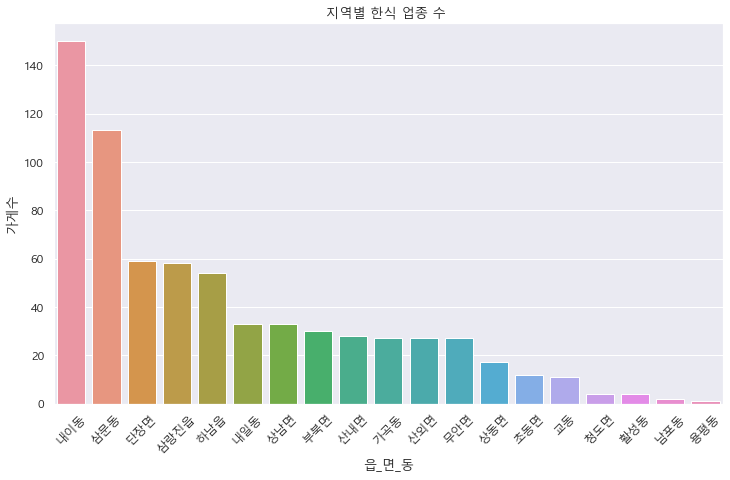

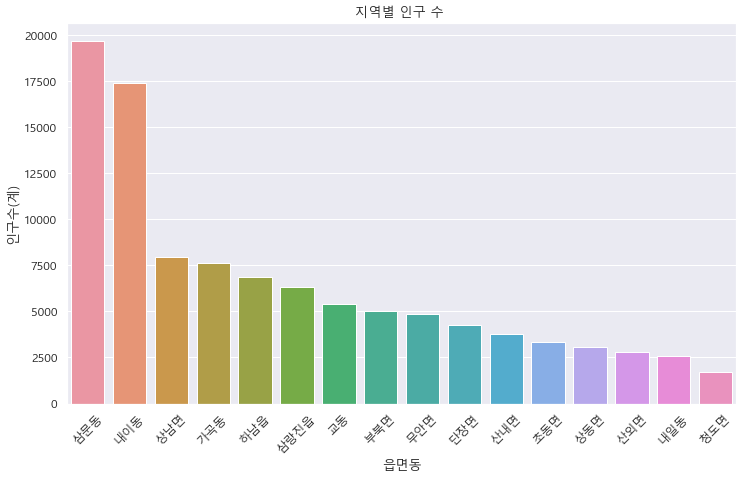

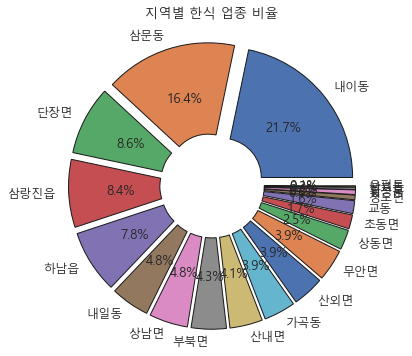

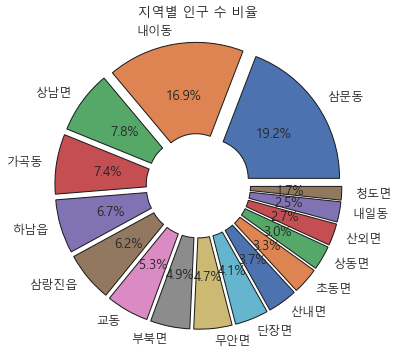

In [117]:
# 밀양 지역별 가게 업종 수 분석 - 막대그래프
print("가게 업종 리스트\n",m_data['카테고리'].unique())
store_kind = input('가게 업종을 입력해주세요 : ')

plt.figure(1,[12,7])
x = m_data[m_data['카테고리']==store_kind].sort_values('가게수',ascending=False)['읍_면_동']
y = m_data[m_data['카테고리']==store_kind].sort_values('가게수',ascending=False)['가게수']

sns.barplot(x=x,y=y)
plt.xticks(rotation=45)
plt.title(f'지역별 {store_kind} 업종 수 ')


# 밀양 지역별로 가게 업종수 분석하기 - 파이그래프
plt.figure(3,[8,6])
wedgeprops = {'width':0.7,'edgecolor':'k','linewidth':1 }
x =m_data[m_data['카테고리']==store_kind].sort_values('가게수',ascending=False)['가게수']
labels = m_data[m_data['카테고리']==store_kind].sort_values('가게수',ascending=False)['읍_면_동']
explode = []
for i in range(len(x)):
    explode.append(0.1)
    
plt.pie(x, labels=labels, autopct='%.1f%%',explode=explode,wedgeprops=wedgeprops)
plt.title(f'지역별 {store_kind} 업종 비율')


plt.show()

가게 업종 리스트 ( 모든 가게 업종 출력 : 전체 입력
 ['분식' '한식' '카페(디저트)' '술집' '일식' '고깃집(정육점)' '생선회' '양식' '치킨' '패스트푸드' '중식'
 '게/대게' '베이커리' '건어물' '샐러드' '베트남 음식' '토스트' '기타']
10년 단위별로 검색할 가게 업종을 입력해주세요 : 한식


C:\Users\KDJ\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KDJ\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\KDJ\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

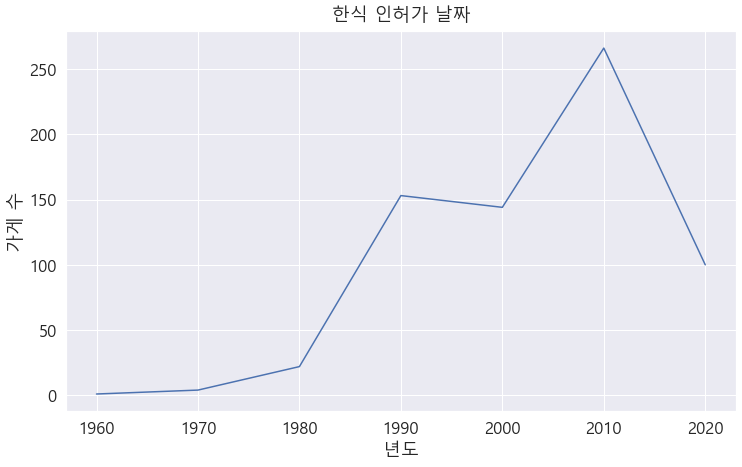

In [65]:
# 인허가일자 데이터 프레임
# licensing_data = data_1[['인허가일자','동_면_읍','카테고리']].set_index('인허가일자')
licensing_dataframe = data_1[['인허가일자','읍_면_동','카테고리']].copy()

# 10년 단위별 인허가난 가게 업종별로 보기
print('가게 업종 리스트 ( 모든 가게 업종 출력 : 전체 입력\n',licensing_dataframe['카테고리'].unique())
s_name = input('10년 단위별로 검색할 가게 업종을 입력해주세요 : ')
if(s_name!='전체'):
    s_dataframe = licensing_dataframe[licensing_dataframe['카테고리']==s_name]
else:
    s_dataframe = licensing_dataframe

# 인허가 년/월 컬럼생성
s_dataframe['인허가일자(년-월)']='None'

# 10년 단위로 가게 인허가 수 
for i in s_dataframe.index:
    s_dataframe.loc[i,'인허가일자(년-월)'] = s_dataframe.loc[i,'인허가일자'][:3]+'0' 
    
licensing_year_data = s_dataframe['인허가일자(년-월)']
licensing_data= licensing_year_data.value_counts()

licensing_data = licensing_data.sort_index(ascending=True)

plt.figure(1,[12,7])
plt.title(f'{s_name} 인허가 날짜', pad=10)
plt.grid(True)
plt.xlabel('년도')
plt.ylabel('가게 수')

sns.lineplot(data=licensing_data)

plt.show()
